In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from PIL import Image
from numpy import asarray
from tensorflow import keras

In [49]:
# mount google drive 
# from google.colab import drive
# drive.mount('/content/drive')

In [50]:
x_train = []
x_test = []

In [51]:
os.chdir('/content/drive/MyDrive/Datasets/')

for i in os.listdir('./fundus_train_images'):
  img = Image.open('./fundus_train_images/' + i)
  data = asarray(img)
  data = np.array([cv.resize(data, (256, 256))])
  x_train.append(data[0] / 255)

x_train = np.array(x_train)

In [52]:
print(x_train.shape)

(147, 256, 256, 3)


In [53]:
for i in os.listdir('./fundus_test_images'):
  img = Image.open('./fundus_test_images/' + i)
  data = asarray(img)
  data = np.array([cv.resize(data, (256, 256))])
  x_test.append(data[0] / 255)

x_test = np.array(x_test)

In [54]:
dim = x_train.shape[1]

x_train = np.reshape(x_train, (len(x_train), dim, dim, 3))
x_test = np.reshape(x_test, (len(x_test), dim, dim, 3))

In [55]:
noise_factor = 0.01

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

In [56]:
n = 3
for i in range(n):
  fig, axes = plt.subplots(1, 2)
  fig.set_size_inches(5, 5)
  axes[0].set_title("True Image")
  im0 = axes[0].imshow(x_test[i].reshape(dim, dim, -1), cmap="Reds")
  axes[1].set_title("Noisy Image")
  im1 = axes[1].imshow(x_test_noisy[i].reshape(dim, dim, -1), cmap="Reds")
  plt.close(fig)

In [57]:
print(x_train_noisy.shape)

(147, 256, 256, 3)


In [58]:
import tensorflow as tf

def unet2(IMG_WIDTH,IMG_HEIGHT,IMG_CHANNEL):
  inputs= tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNEL))
  c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(inputs)
  c1=tf.keras.layers.Dropout(0.1)(c1)
  c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
  #c1=tf.keras.layers.Dropout(0.1)(c1)
  p1=tf.keras.layers.MaxPooling2D((2,2))(c1)

  c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
  c2=tf.keras.layers.Dropout(0.1)(c2)
  c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
  #c2=tf.keras.layers.Dropout(0.1)(c2)
  p2=tf.keras.layers.MaxPooling2D((2,2))(c2)

  c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
  c3=tf.keras.layers.Dropout(0.1)(c3)
  c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
  #c3=tf.keras.layers.Dropout(0.1)(c3)
  p3=tf.keras.layers.MaxPooling2D((2,2))(c3)

  c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
  c4=tf.keras.layers.Dropout(0.1)(c4)
  c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
  #c4=tf.keras.layers.Dropout(0.1)(c4)
  p4=tf.keras.layers.MaxPooling2D((2,2))(c4)

  c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
  c5=tf.keras.layers.Dropout(0.1)(c5)
  c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)
  #c5=tf.keras.layers.Dropout(0.1)(c5)

  u6=tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
  u6=tf.keras.layers.concatenate([u6,c4])
  c6=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u6)
  c6=tf.keras.layers.Dropout(0.1)(c6)
  c6=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c6)
  #c4=tf.keras.layers.Dropout(0.1)(c4)

  u7=tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
  u7=tf.keras.layers.concatenate([u7,c3])
  c7=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u7)
  c7=tf.keras.layers.Dropout(0.1)(c7)
  c7=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c7)

  u8=tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
  u8=tf.keras.layers.concatenate([u8,c2])
  c8=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u8)
  c8=tf.keras.layers.Dropout(0.1)(c8)
  c8=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c8)

  u9=tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
  u9=tf.keras.layers.concatenate([u9,c1])
  c9=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u9)
  c9=tf.keras.layers.Dropout(0.1)(c9)
  c9=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c9)

  outputs=tf.keras.layers.Conv2D(3,1,activation='sigmoid')(c9)

  model=tf.keras.Model(inputs=[inputs],outputs=[outputs])  
  return model

model = unet2(256,256,3)

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 256, 256, 16  448         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_18 (Dropout)           (None, 256, 256, 16  0           ['conv2d_38[0][0]']              
                                )                                                           

In [59]:
# autoencoder = unet2(dim, dim, 3)

# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# validation_split = 0.8
# history = autoencoder.fit(
#     x_train_noisy, 
#     x_train,
#     epochs = 50,
#     batch_size = 20,
#     shuffle = True,
#     validation_split = validation_split
# )


In [60]:
# save the fucking model
os.chdir('/content/drive/MyDrive/Datasets/')
# os.mkdir('/saved_models')
# autoencoder.save('./saved_models/model_0')

In [61]:
# autoencoder = keras.models.load('load model')
autoencoder = keras.models.load_model('./saved_models/model_0')

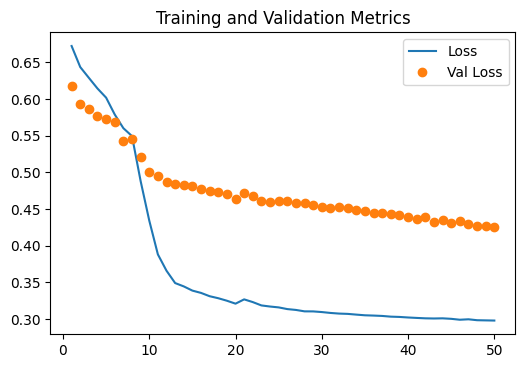

In [62]:
history.history.keys()

train_loss = history.history["loss"]
train_val_loss = history.history["val_loss"]
epochs = range(1, len(train_loss) + 1)

plt.figure(dpi = 100)
plt.plot(epochs, train_loss, label="Loss")
plt.plot(epochs, train_val_loss, "o", label="Val Loss")
plt.title("Training and Validation Metrics")
plt.legend()
plt.savefig("history.png")
plt.show()

In [63]:
all_denoised_images = autoencoder.predict(x_test_noisy)

test_loss = autoencoder.evaluate(x_test_noisy, x_test, batch_size = 20)

1/1 [==============================] - 0s 491ms/step - loss: 0.2132


In [64]:
def sharpen_img(image):
  kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
  image = cv.filter2D(image, -1, kernel)
  return image

In [65]:
os.chdir('/content/drive/MyDrive/Datasets/comparison_images')
print(os.getcwd())

/content/drive/MyDrive/Datasets/comparison_images


In [66]:
cnt = 1
n = 18
for i in range(n):
  fig, axes = plt.subplots(1, 4)
  fig.set_size_inches(8, 2)
  axes[0].set_title("Noisy image")
  im0 = axes[0].imshow(x_test_noisy[i].reshape(dim, dim, -1))
  axes[1].set_title("Target image")
  im1 = axes[1].imshow(x_test[i].reshape(dim, dim, -1))
  axes[2].set_title("Denoised image")
  im2 = axes[2].imshow(all_denoised_images[i].reshape(dim, dim, -1))
  axes[3].set_title("Sharpened Image")
  final_img = all_denoised_images[i]
  final_img = sharpen_img(all_denoised_images[i]).reshape(dim, dim, -1)
  cnt += 1
  im3 = axes[3].imshow(final_img)
  plt.savefig(f"./comparison-{i}.png")
  plt.close(fig)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

In [67]:
#check if the files are saved
print(os.listdir())

['comparison-0.png', 'comparison-1.png', 'comparison-2.png', 'comparison-3.png', 'comparison-4.png', 'comparison-5.png', 'comparison-6.png', 'comparison-7.png', 'comparison-8.png', 'comparison-9.png', 'comparison-10.png', 'comparison-11.png', 'comparison-12.png', 'comparison-13.png', 'comparison-14.png', 'comparison-15.png', 'comparison-16.png', 'comparison-17.png']
